MACHINE LEARNING MODEL
Data loaded: (1095, 26)
Features shape: (1095, 5)
Target shape: (1095,)
Training set: (876, 5)
Testing set: (219, 5)

Training the Random Forest model...
Model training completed!

Model Evaluation Metrics:
Training Accuracy: 0.9954 (99.54%)
Test Accuracy: 0.5068 (50.68%)
Precision: 0.5097
Recall: 0.5068
F1-Score: 0.4978

Feature Importance:
                 feature  importance
4          team2_encoded    0.293635
3          team1_encoded    0.236171
0         season_encoded    0.209765
1          venue_encoded    0.208808
2  toss_decision_encoded    0.051621


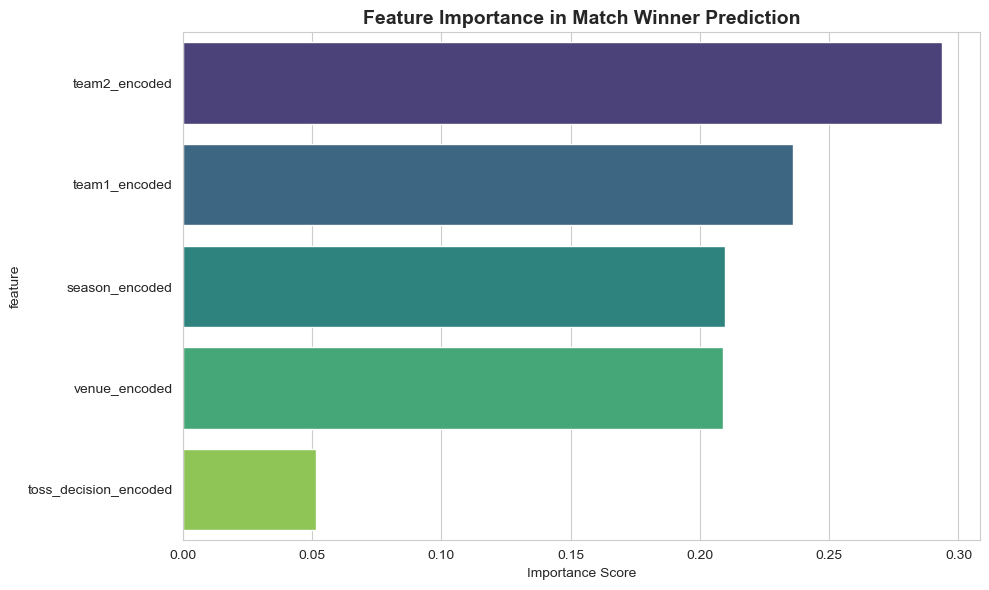

<module 'seaborn' from 'd:\\Anaconda\\envs\\ipl-env\\Lib\\site-packages\\seaborn\\__init__.py'>

<Figure size 1000x800 with 0 Axes>

In [16]:
# ============================================
# NOTEBOOK 5: MACHINE LEARNING MODEL
# ============================================

# CELL 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import warnings
import os

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

# CELL 2: Load Feature-Engineered Data
matches_ml = pd.read_csv('../data/matches_features.csv')

print("="*60)
print("MACHINE LEARNING MODEL")
print("="*60)
print(f"Data loaded: {matches_ml.shape}")

# CELL 3: Prepare Features and Target
feature_cols = ['season_encoded', 'venue_encoded', 'toss_decision_encoded', 'team1_encoded', 'team2_encoded']
X = matches_ml[feature_cols].copy()
y = matches_ml['winner_encoded'].copy()

# Remove ties/no results for classification
non_tie_mask = matches_ml['winner'] != 'Tie'
X = X[non_tie_mask]
y = y[non_tie_mask]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# CELL 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# CELL 5: Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

print("\nTraining the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training completed!")

# CELL 6: Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# CELL 7: Model Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("\nModel Evaluation Metrics:")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# CELL 8: Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Match Winner Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('../outputs/figures/07_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# CELL 9: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns
